## Modeling and Simulation in Python

Project 1

Manu Patil & Richard Gao

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_csv
import numpy
import math
import pprint
from functools import reduce

### What would be the impact on the U.S. population if the flu vaccination was never introduced?

There has been a growing population that believes that the flu vaccine has no effect in preventing the disease. With massive advances in sciences over the years, there is most likely a non-negligble effect of the vaccine. 

To further dive into this question, we will attempt to model the U.S. population with and without the influenza vaccine. In order to model this hypothetical situation we will look at the following parameters:

* number of people vaccinated over time
* birth rate
* death rate
    * due to influenza
    * excluding influenza
* rate of disease spread
* total population

### Basic Model Breakdown

Time unit = months
System(population, infected, number of people vaccinated, birth rate, death rate<sans influenza>, infection rate, disease death rate<flu effectiveness>)

State( pop, infected people, vaccinated people)
Vaccinated people = read in percentage data and apply to population


Pop = pop *birthrate –pop *death rate <sans influenza>

Without Vaccine Situation
	Infected [t+1] = infected[t] + infected * infection rate
	Killed by flu = Infected* Disease Death rate

With Vaccine situation
	Vaccinated = read in data
Infected [t+1] = infected[t] + infected * infection rate
Killed by Flu = Infected * (population – vaccinated people) * Disease Death rate.










### Read data in from csv

Using the read_csv function from pandas to parse and read in influenza data from the Center for Disease Control and Prevention database.

In [2]:
def fill_list(x, y):
    interval = list(range(x, y))
    return interval

In [3]:
csv = read_csv("data/2015-2016.csv", encoding = "ISO-8859-1")

# Get the index of where each age group starts
new_group_start = []

size_of_csv = None

for size_of_csv, age_group in enumerate(csv.values[0]):
    if not isinstance(age_group, float):
        new_group_start.append(size_of_csv)  

# Isolate and retrieve just the U.S population row
us_pop_row = 54
skiprows = list(filter(lambda x : x != 2 and x != us_pop_row, range(0, us_pop_row + 1)))

# Go through each age group and get SAMPLE and puth each age groups months into a month array
rates_by_month = [[], [], [], [], [], [], [], [], [], [], []] # 2D array containing arrays of rates by different months
sample_sizes = [] # 1D array, each index corresponds to an array in rates_by_month
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May',]

# Loop through each age group    
for index in range(0, len(new_group_start)):
    if index + 1 == len(new_group_start): # Last age group
        interval = fill_list(new_group_start[index], size_of_csv)
    else: 
        interval = fill_list(new_group_start[index], new_group_start[index + 1])

    # Get data for an age group
    df = read_csv('data/2015-2016.csv', skipinitialspace=True, skiprows=skiprows, usecols=interval, nrows=1, encoding="ISO-8859-1")

    # Put sample size for each age group into sample_sizes
    sample_sizes.append(df[df.columns[4]].iloc[0])

    # Put each month's rate into rates_by_month
    for month_num, month in enumerate(months):
        month_name = f'{month}.{index}'
        if index == 0:
            month_name = month
        if not isinstance(df[[month_name]].iloc[0][month_name], float):
            rates_by_month[month_num].append(0)
        else:
            rates_by_month[month_num].append(df[[month_name]].iloc[0][month_name])

# Compute total sample population in us
sample_total = reduce((lambda x, y: x + y), sample_sizes)

# Calculate influeza rates by month in us
us_influeza_vac_by_month = []
for month in rates_by_month:
    sum = 0
    for index, rate in enumerate(month):
        sum += sample_sizes[index] * rate
    us_influeza_vac_by_month.append(sum / sample_total)

# Print us population vaccination by month
print(us_influeza_vac_by_month)
vacc =[]
vacc.insert(0, us_influeza_vac_by_month[0])
vPast = vacc[0];
for i in range(1,10,1):
    vacc.insert(i,us_influeza_vac_by_month[i]- vPast)
    vPast = us_influeza_vac_by_month[i] 
print(vacc)

[0.564762683161331, 2.2468697044963903, 8.819293704319323, 25.841367158335924, 35.050871222529516, 38.409085579387146, 40.92616652909716, 42.433629400177175, 43.37507688686603, 43.9841261889325, 44.401958381491646]
[0.564762683161331, 1.6821070213350593, 6.572423999822933, 17.0220734540166, 9.209504064193592, 3.35821435685763, 2.5170809497100137, 1.5074628710800155, 0.9414474866888582, 0.6090493020664667]


In [4]:
birth_rate = read_csv('data/BirthRates201718.csv', skipinitialspace=True, usecols=[2])

print(birth_rate)
birth_rate[birth_rate.columns[0]].iloc[1]

    Data Value
0       314000
1       289000
2       320000
3       300000
4       322000
5       324000
6       335000
7       352000
8       337000
9       330000
10      316000
11      316000
12      314000
13      284000
14      315000


289000

In [5]:
death_rate = read_csv("data/DeathRates2017-18.csv", skipinitialspace=True, usecols=[2])

death_rate

,Deaths
0,264900
1,235900
2,253900
3,233900
4,231900
5,220800
6,223800
7,223900
8,221900
9,232800


### Model

In [18]:
system = System(initpopulation = 300000000,vaccinationPercent = vacc, infection_rate = 0, vaccineeffectiverate =0)
pops = State(vaccinated = TimeSeries(), infected= TimeSeries(), population= TimeSeries())
print(pops.population)

Series([], dtype: float64)


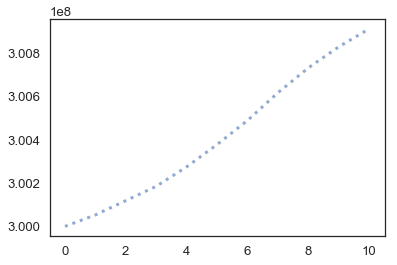

In [17]:
def justPop():
    pops.population[0] = system.initpopulation
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:       
        pops.population[i] = pops.population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i]
    plot(pops.population,':', label = 'Population')

justPop()

In [26]:
def pop__vaccine():
    pops.population[0] = system.initpopulation
    pops.vaccinated[0] = 0
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        deltavaccinated = pops.population[i] * system.vaccinationPercent[i-1] 
        print(deltavaccinated)
        pops.vaccinated[i] = pops.vaccinated[i-1] + deltavaccinated


        pops.population[i] = pops.population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated

    plot(pops.population,':', label = 'Population');
    plot(pops.vaccinated, label ='Vaccinated')
pop__vaccine()

KeyError: 1

In [23]:
pops.population[0] = system.initpopulation
pops.vaccinated[0] = 0
months = [1,2,3,4,5,6,7,8,9,10]
for i in months:
    print(pops.population[i])
    deltavaccinated = pops.population[i] * system.vaccinationPercent[i-1] #Read in from csv
    print(deltavaccinated)
    pops.vaccinated[i] = pops.vaccinated[i-1] + deltavaccinated
   
    
    #deltainfected = pops.population * system.infection_rate + pops.vaccinated * system.vaccineeffectiverate 
    pops.population = pops.population  #- deltainfected
    
    pops.population[i+1] = pops.population[i] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated

plot(pops.population,':', label = 'Population');
plot(pops.vaccinated, label ='Vaccinated')

KeyError: 1